# Gambler Problem

Anshuman Dash, Phillip Peng, Frank Yao

**Problem statement:** a gambler repeatedly places bets on the outcomes of a sequence of coin
flips. If the flip is heads, then she wins as many dollars as she has bet on that flip; if it is tails, she
loses all the bet. The game ends when the gambler reaches her goal of making $100, or when she runs
out of money. At each time, the gambler chooses how much of her money to bet on the next flip.
This situation can be formulated as an undiscounted, episodic, finite MDP. The state is the
gambler’s capital s ∈ {0, 1, 2, . . . , 99, 100}, and her actions are stakes (i.e., how much to bet) a ∈
{0, 1, . . . , min{s, 100 − s}}. The rewards are zero for all state transitions, except when the transition
leads to the gambler reaching her $100 goal, in which case the reward is +1. Let ph be the probability
that the coin flips heads.

**States**: Current amount of capital s $\in$ {1,2,...,99}\
**Actions**: Bet a $\in$ {0,1,...,min(s,100-s)} \
**Transitions**: Money Gained or lost dependent on Coin Flip \
**Reward**: 0 for any action until it reaches $100 where it gets a reward of +1

Package Imports

In [204]:
import numpy as np
import random
from tqdm import tqdm
from matplotlib import pyplot as plt
from collections import defaultdict

Reward Function

In [13]:
p_h = .5
# s = capital you have
# a = capital to bet

def value_iteration(p_h, iters = float('inf')):
    S = np.zeros(101)
    S[100] = 1
    A = [[0] for _ in range(100)]
    it = 0
    
    while it < iters:
        it+=1
        old = S.copy()
        for s in range(1,len(S)-1):
            choices = [S[s+a]*p_h + S[s-a]*(1-p_h) for a in range(0, min(s,100-s)+1)]
            choices = [round(x,8) for x in choices]
            S[s] = max(choices)
            best_a, best_val = None, float('-inf')
            for a,v in enumerate(choices):
                if v - 1e-6 > best_val or best_a == 0:
                    best_val = v
                    best_a = a
            # A[s] = np.argwhere(choices==max(choices)).flatten().tolist()
            A[s] = best_a
        if sum(abs(old-S)) == 0:
            break
    return S,A

In [28]:
values, actions = value_iteration(.4)

In [29]:
def ev(s,a,p_h):
	return values[s+a]*p_h+values[s-a]*(1-p_h)

In [30]:
v = 26
for i in range(1,v+1):
	print(i,ev(v,i,.4))

1 0.16309844
2 0.156024078
3 0.15189408
4 0.14996294799999998
5 0.147418186
6 0.145883712
7 0.14525141000000003
8 0.143138652
9 0.142044724
10 0.142625766
11 0.14325426
12 0.144864792
13 0.14486480000000002
14 0.143254264
15 0.14262576200000002
16 0.142044728
17 0.143138654
18 0.14525141000000003
19 0.145883714
20 0.147418184
21 0.14996294400000001
22 0.15189408000000001
23 0.156024074
24 0.16309843600000004
25 0.162478748
26 0.16309844


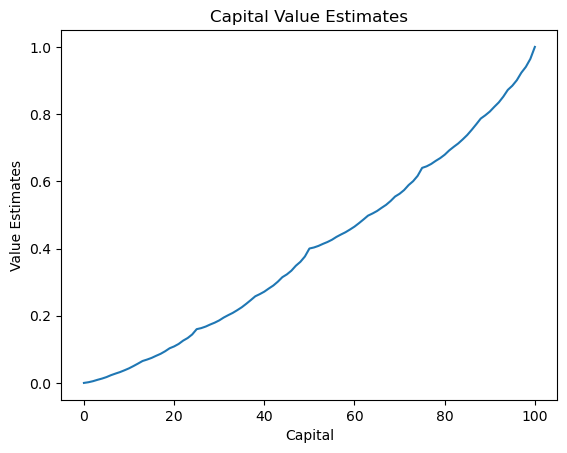

In [31]:
plt.plot(range(101), values)
plt.title("Capital Value Estimates"); plt.xlabel("Capital"); plt.ylabel("Value Estimates")
plt.show(); 

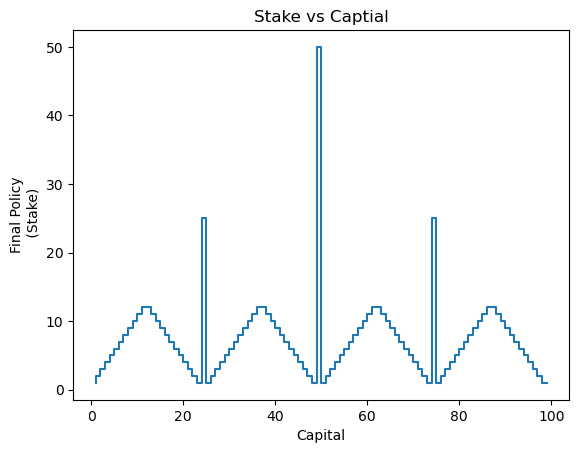

In [32]:
plt.step(range(1,100), actions[1:])
plt.xlabel("Capital"); plt.ylabel("Final Policy\n (Stake)"); plt.title("Stake vs Captial")
plt.show()

## Monte Carlo 

Episode Generation

In [278]:
def generateEpisode(p_h=.55,policy = lambda s: 1):
	s = random.randint(1,99)
	S = []
	A = []
	R = []
	while s not in (0,100):
		S.append(s)
		a = policy(s)
		A.append(a)
		if random.random()<=p_h:
			s+=a
		else:
			s-=a
		R.append(1 if s==100 else 0)
	return S,A,R

In [279]:
wins = 0
for _ in range(100):
	S,A,R = generateEpisode()
	wins += R[-1]
print(wins/100)
print(S[-10:],A[-10:],R[-10:])

0.95
[96, 95, 96, 95, 94, 95, 96, 97, 98, 99] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [280]:
def everyVisitMC(p_h=0.55, policy=lambda s:1,gamma = 1, iters = 10000):
	V = [None]*101
	returns = defaultdict(list)
	for _ in tqdm(range(iters)):
		S,A,R = generateEpisode(p_h, policy)
		G = 0
		for t in range(len(S)-1,-1,-1):
			G = gamma*G + R[t]
			returns[S[t]].append(G)
	for k,l in returns.items():
		V[k] = np.average(l)
	# V[S[t]] = sum(returns[S[t]])/len(returns[S[t]])
	return V,returns

In [300]:
V,returns = everyVisitMC()

100%|██████████| 10000/10000 [00:01<00:00, 7834.61it/s]


In [296]:
V

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 None]

In [299]:
V,returns = everyVisitMC(iters = 10)

100%|██████████| 10/10 [00:00<00:00, 6675.64it/s]
